In [2]:
# ideas
import pandas as pd
data_train = pd.read_csv('data_edited.txt',sep=',')
print(data_train)

       sequence-name           tag-id           timestamp          time  \
0                A01  010-000-024-033  633790226051280329  14:03:25:127   
1                A01  020-000-033-111  633790226051820913  14:03:25:183   
2                A01  020-000-032-221  633790226052091205  14:03:25:210   
3                A01  010-000-024-033  633790226052361498  14:03:25:237   
4                A01  010-000-030-096  633790226052631792  14:03:25:263   
...              ...              ...                 ...           ...   
164855           E05  010-000-030-096  633790146419554374  11:50:41:957   
164856           E05  010-000-024-033  633790146419824669  11:50:41:983   
164857           E05  020-000-033-111  633790146420094965  11:50:42:010   
164858           E05  010-000-030-096  633790146420635550  11:50:42:063   
164859           E05  010-000-024-033  633790146420905847  11:50:42:090   

           x-pos     y-pos     z-pos activity  
0       4.062931  1.892434  0.507425  walking  
1  

In [4]:
# all activities in an array, grouped by activity

activities = list(set(data_train['activity']))
tag_ids = list(set(data_train['tag-id']))

# make groups of activity and tag id
data_g_act = []
data_train_grouped = data_train
for column in activities: 
    data_train_grouped = data_train[data_train['activity'] == column]
    for tag_id in tag_ids:
        data_g_act.append(data_train_grouped[data_train['tag-id'] == tag_id])

for i in range(5):
    print(data_g_act[i].head(1))

['lying', 'sitting down', 'walking', 'standing up from lying', 'standing up from sitting', 'on all fours', 'sitting', 'standing up from sitting on the ground', 'falling', 'lying down', 'sitting on the ground']


/var/folders/12/jv8_6f5d3n9c43t5jbmqk1540000gp/T/ipykernel_16877/259231861.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_g_act.append(data_train_grouped[data_train['tag-id'] == tag_id])


    sequence-name           tag-id           timestamp          time  \
735           A01  020-000-032-221  633790226289863368  14:03:48:987   

        x-pos     y-pos     z-pos activity  
735  4.026167  1.307633  0.007242    lying  
    sequence-name           tag-id           timestamp          time  \
733           A01  010-000-024-033  633790226289052487  14:03:48:907   

        x-pos     y-pos     z-pos activity  
733  3.118958  1.772582  0.250951    lying  
    sequence-name           tag-id           timestamp          time  \
734           A01  020-000-033-111  633790226289593069  14:03:48:960   

        x-pos     y-pos     z-pos activity  
734  4.528496  1.331975  0.237928    lying  
    sequence-name           tag-id           timestamp          time  \
737           A01  010-000-030-096  633790226290403954  14:03:49:040   

        x-pos     y-pos     z-pos activity  
737  3.381314  1.366681  0.232407    lying  
    sequence-name           tag-id           timestamp      

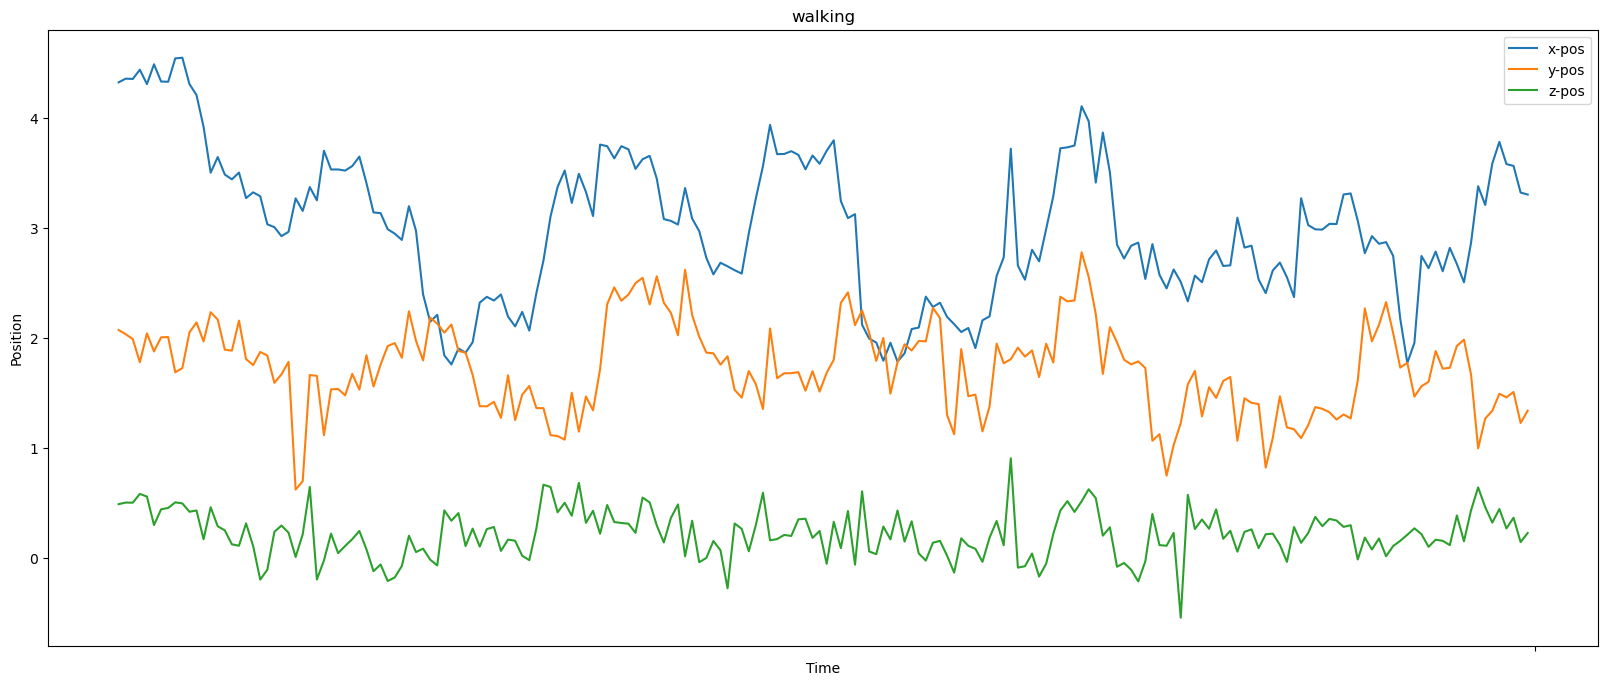

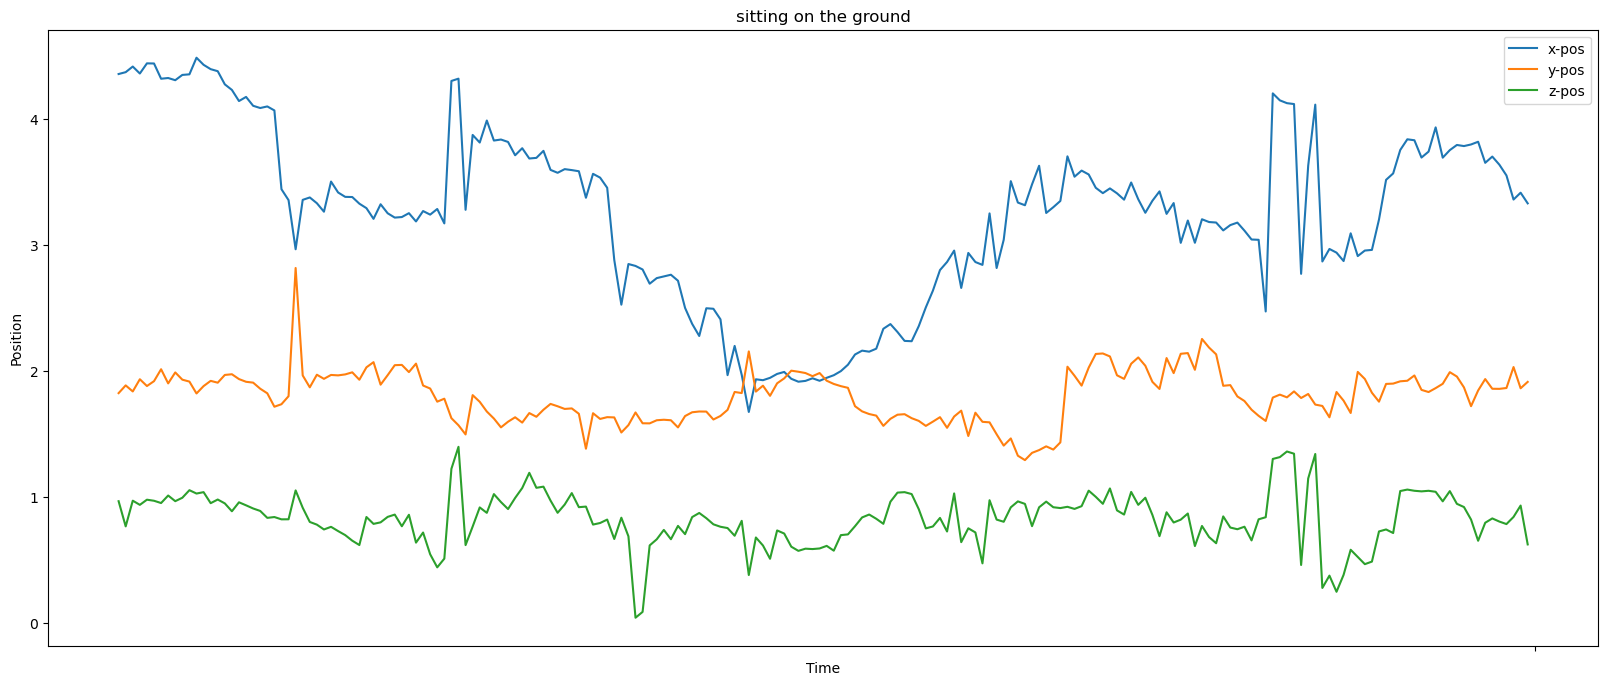

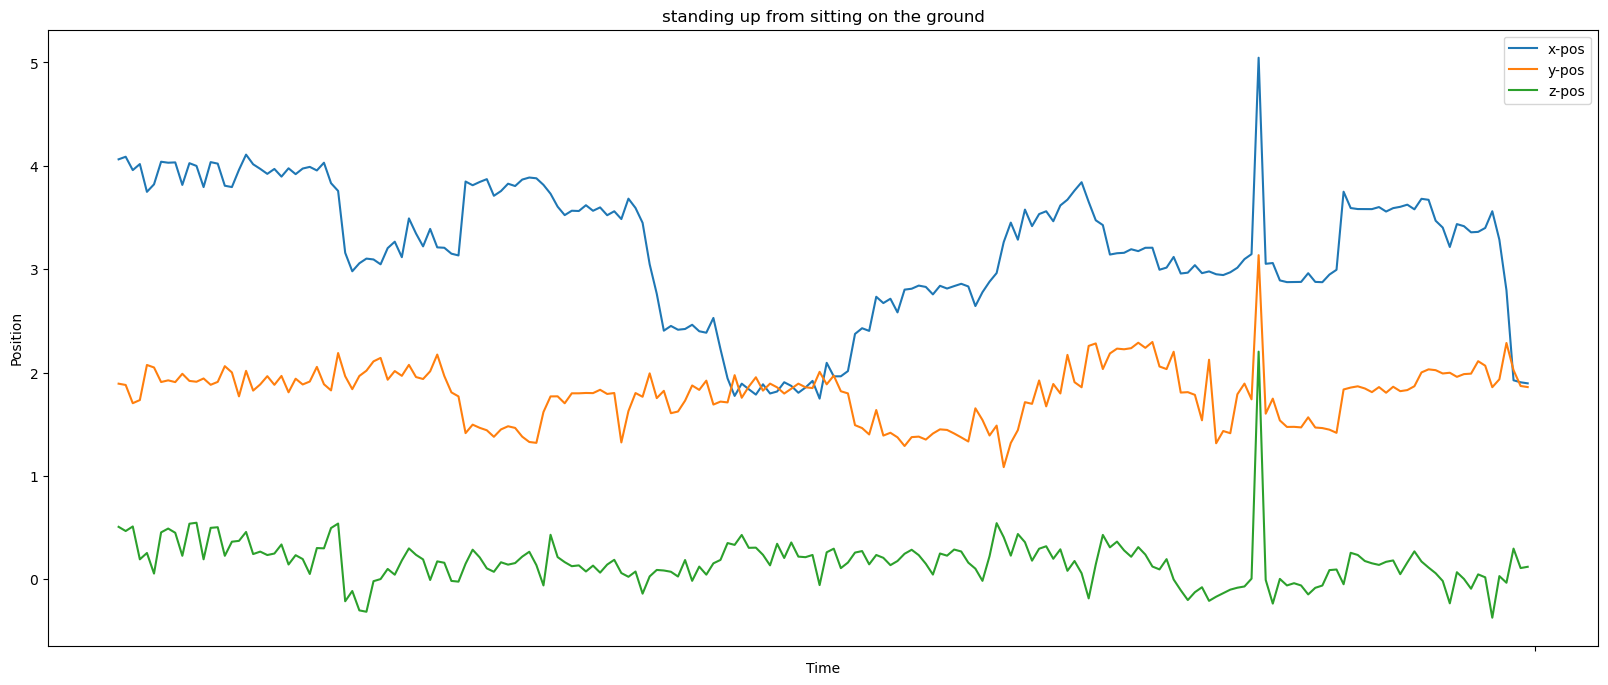

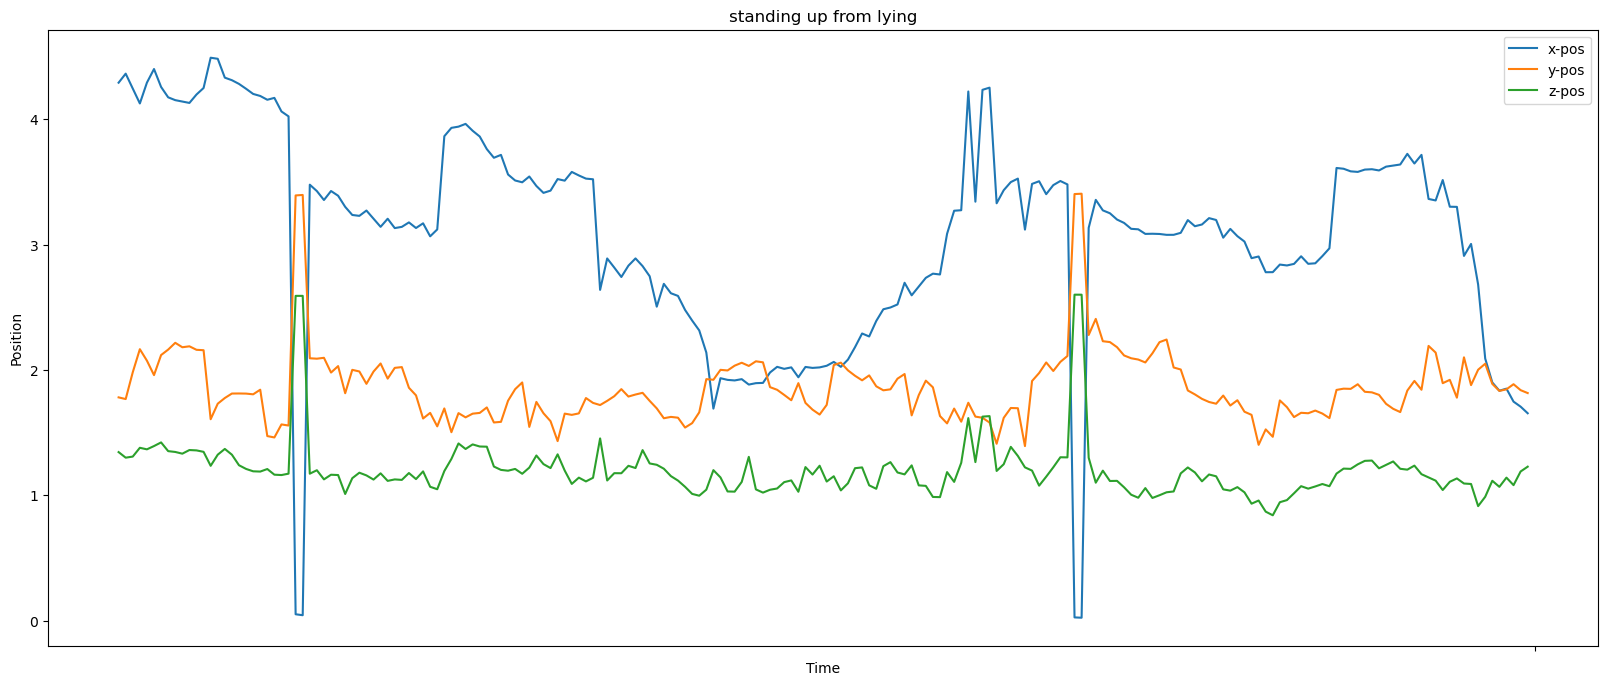

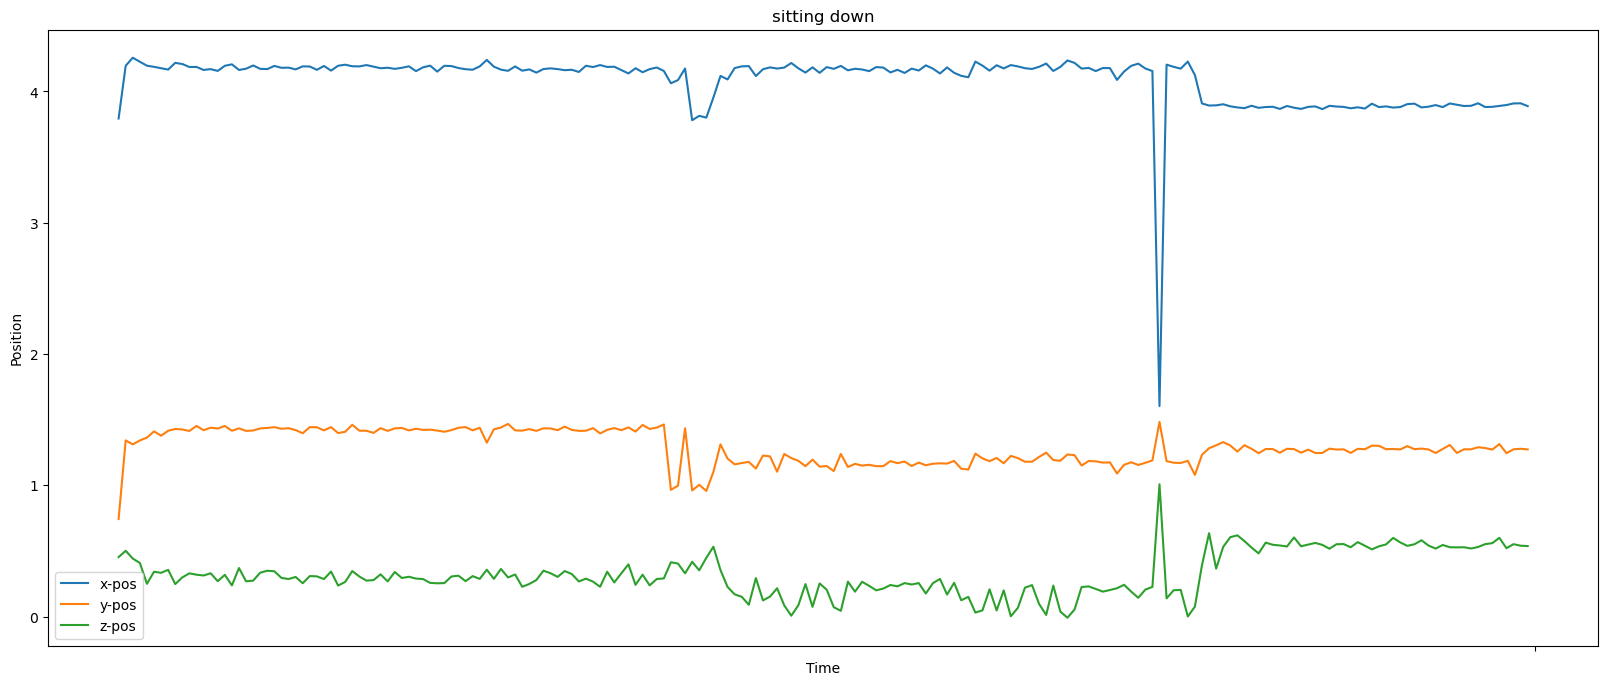

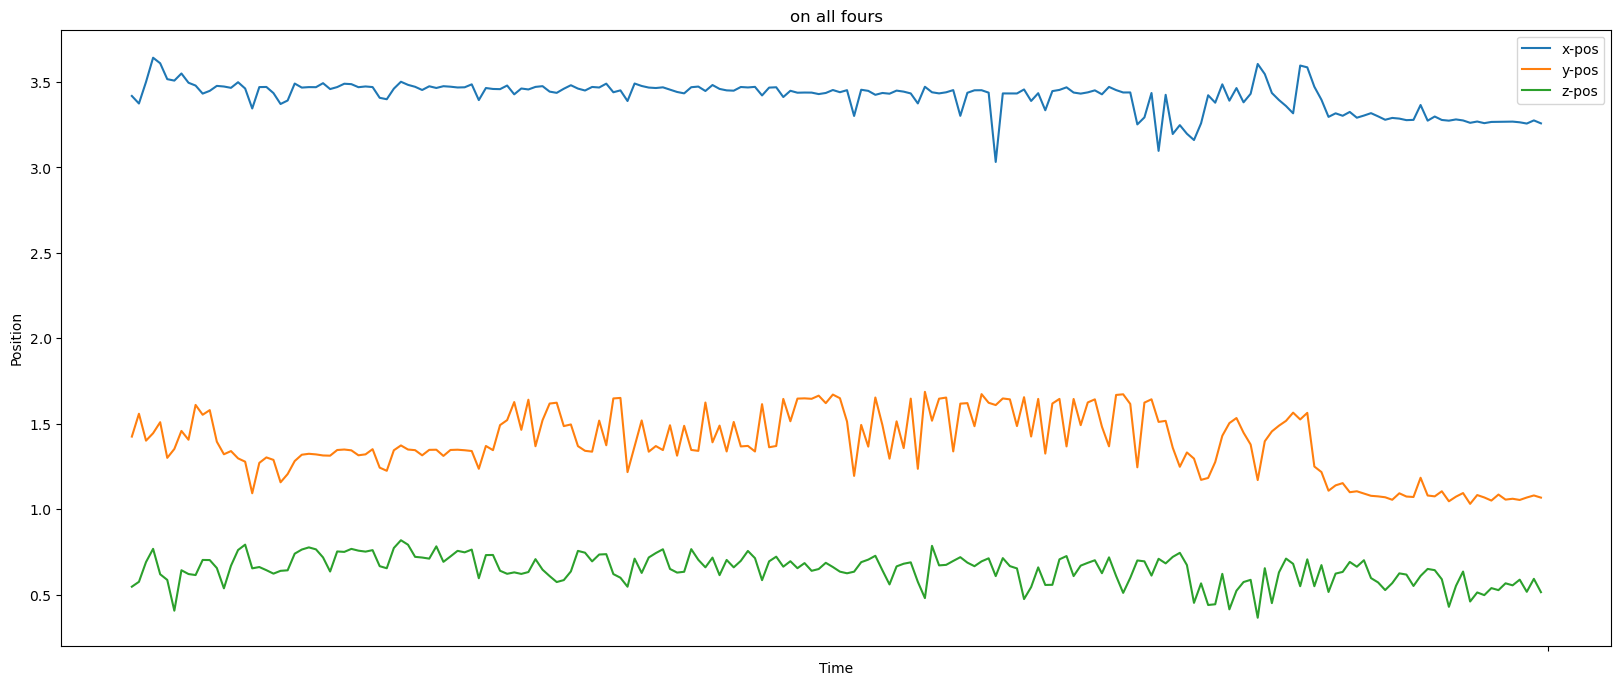

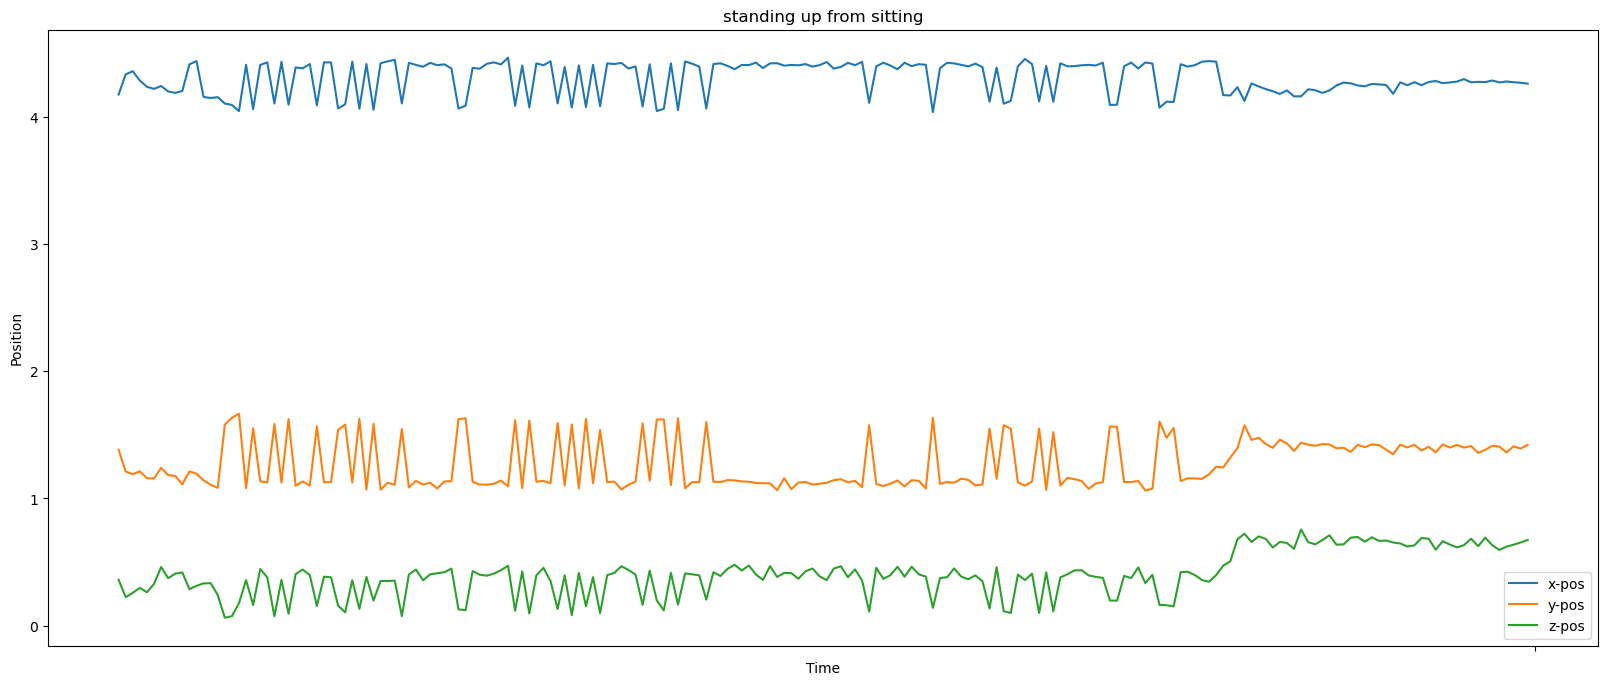

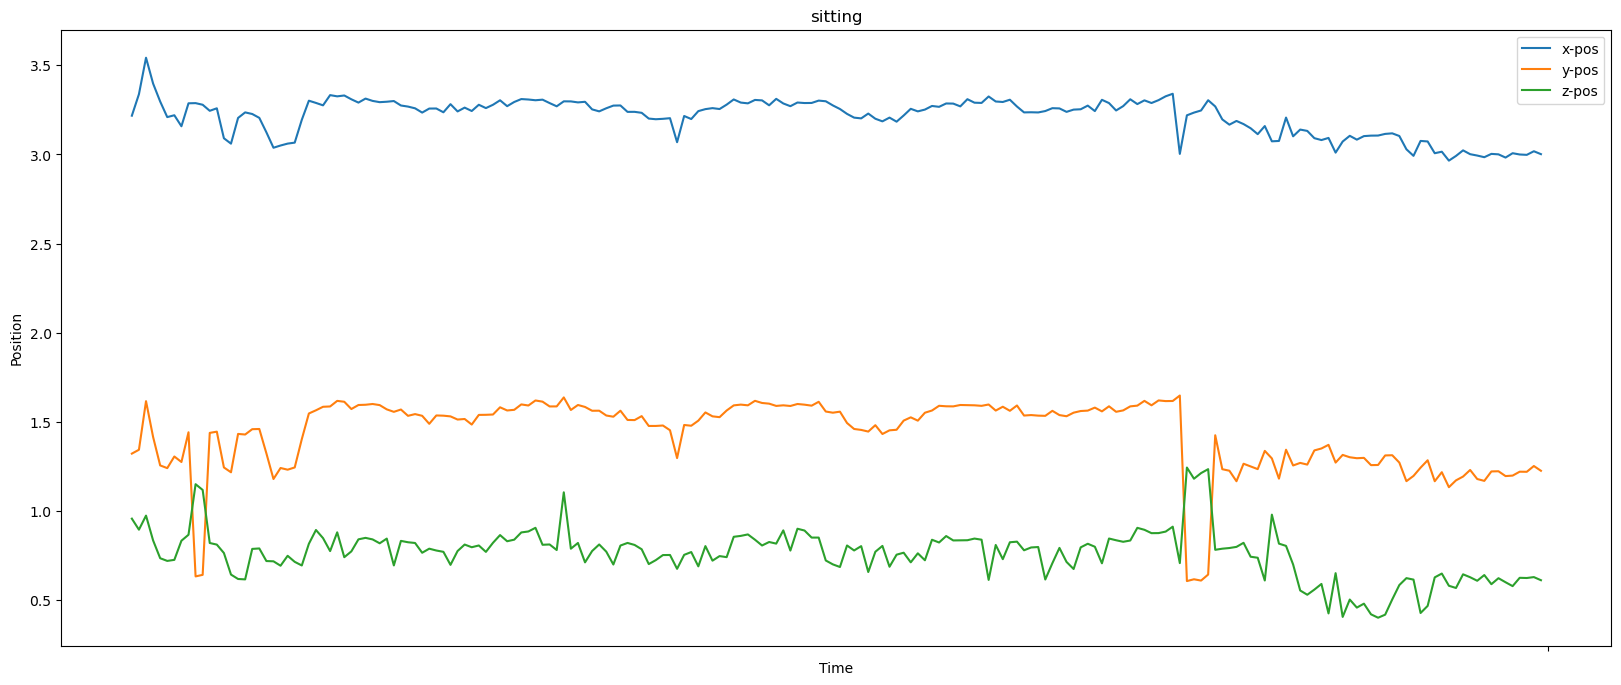

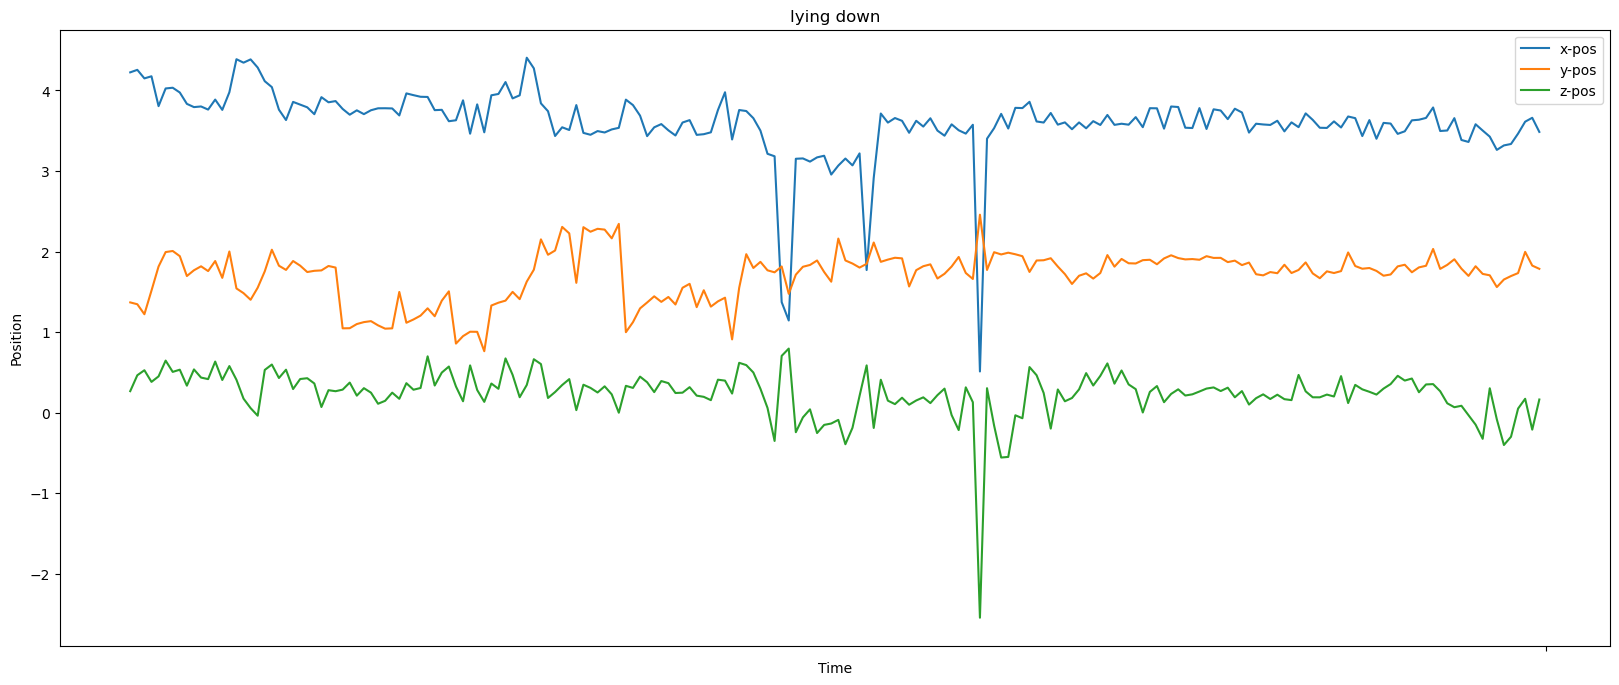

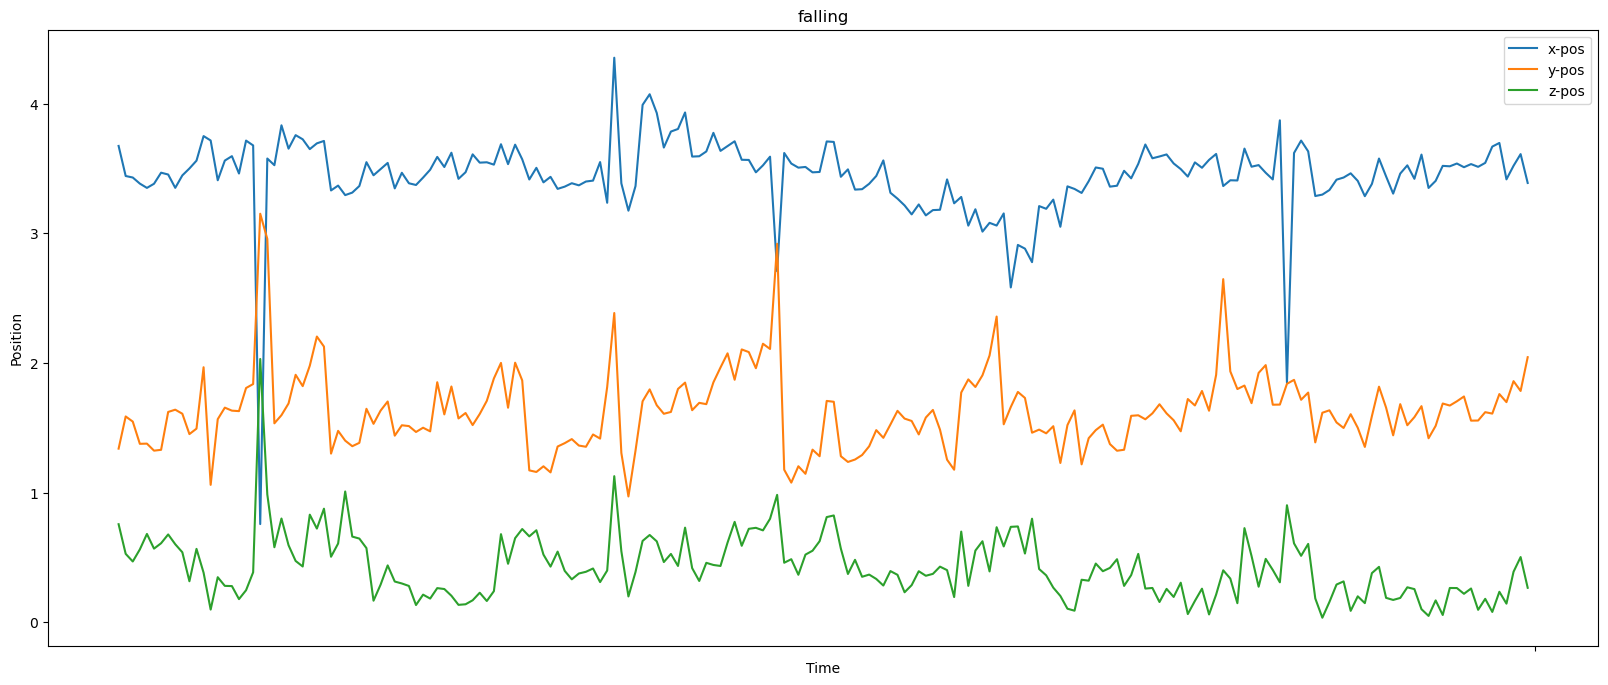

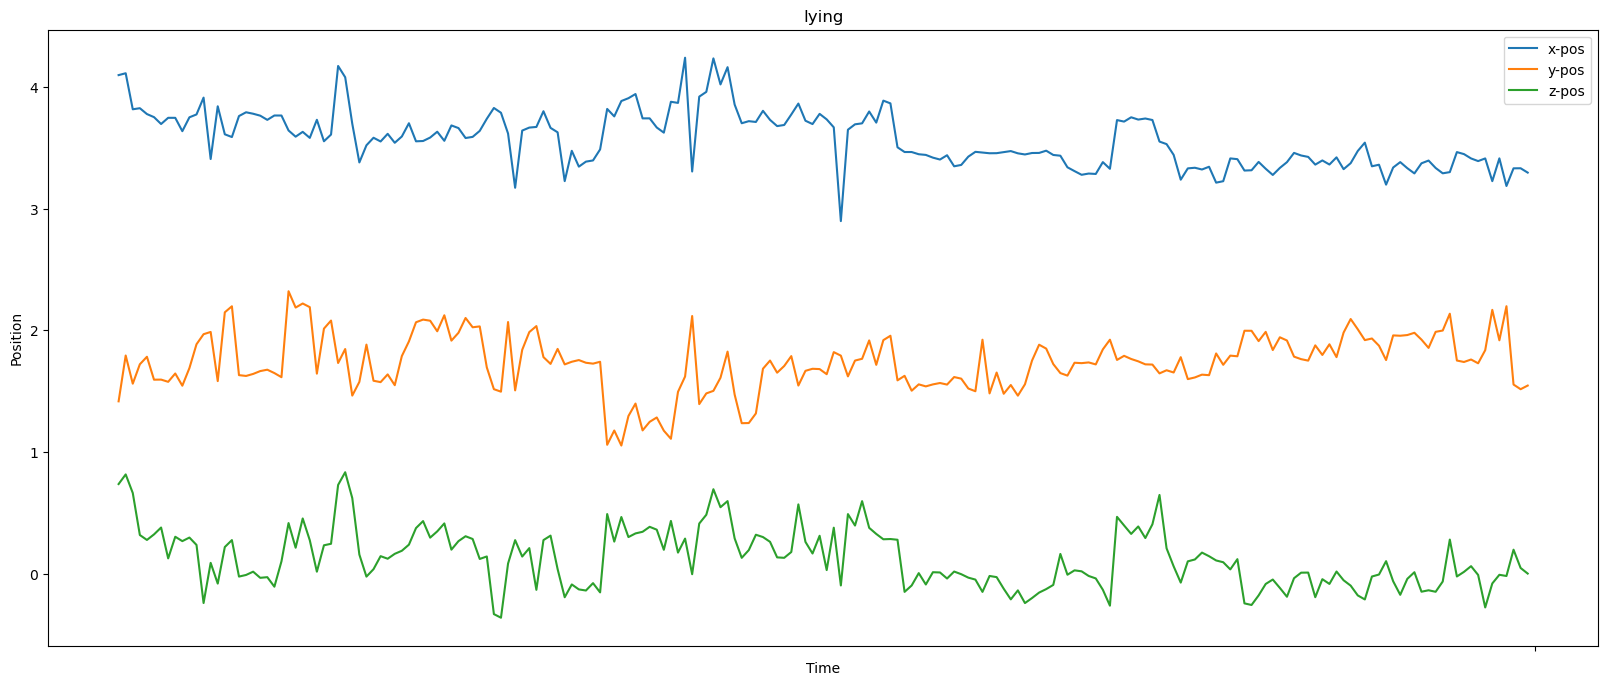

IndexError: list index out of range

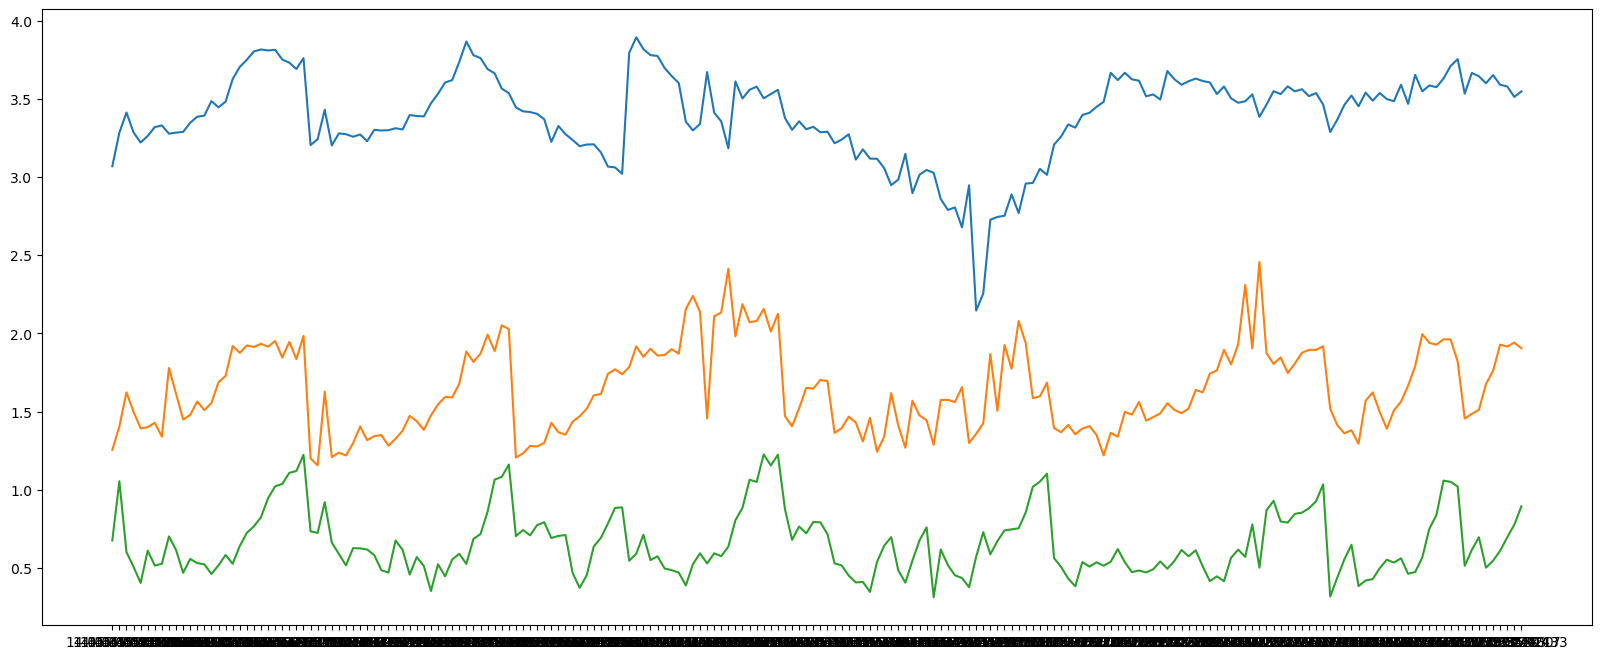

In [5]:
# plot
import matplotlib.pyplot as plt
limit_rows = 200

plt.rcParams["figure.figsize"] = (20,8)


data_g_limited = []
for item in data_g_act:
    data_g_limited.append(item.head(limit_rows))

# this is incorrect for now. Technical process wip.
for i in range(len(data_g_limited)):
    plt.plot(data_g_limited[i]['time'], data_g_limited[i]['x-pos'], label='x-pos')
    plt.plot(data_g_limited[i]['time'], data_g_limited[i]['y-pos'], label='y-pos')
    plt.plot(data_g_limited[i]['time'], data_g_limited[i]['z-pos'], label='z-pos')

    plt.title(activities[i])
    plt.xlabel('Time')
    plt.xticks('',rotation=90)
    plt.ylabel('Position')
    plt.legend()
    plt.show()